# Name : Vishnu Gs

# The Spark Foundation : Data Science and Business Analytics Intership

# 

# Task 3 : Exploratory Data Analysis - Retail Online Store

In [34]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sb

In [35]:
#Importing Dataset
df = pd.read_csv('SampleSuperstore.csv')

In [36]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [37]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [38]:
#cheching the variables in the dataset and their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [39]:
 #We don need postalcode column as it has not use in explorartory Data Analysis
df = df.drop(['Postal Code'], axis=1)

In [40]:
df.head(1)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136


In [41]:
#Description of Dataset
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [42]:
#checking if there is any null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [43]:
#checking if there is any duplicate values
df.duplicated().sum()

50

In [44]:
#Deleting duplictae values
df = df.drop_duplicates()
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [45]:
#checking unique values in category column
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [46]:
#checking unique values in Sub-Category column
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [47]:
#counting the number of repetition of each values in Category column
df['Category'].value_counts()

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

In [48]:
#counting the number of repetition of each values in Sub-Category column
df['Sub-Category'].value_counts()

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## Visualizing the Data

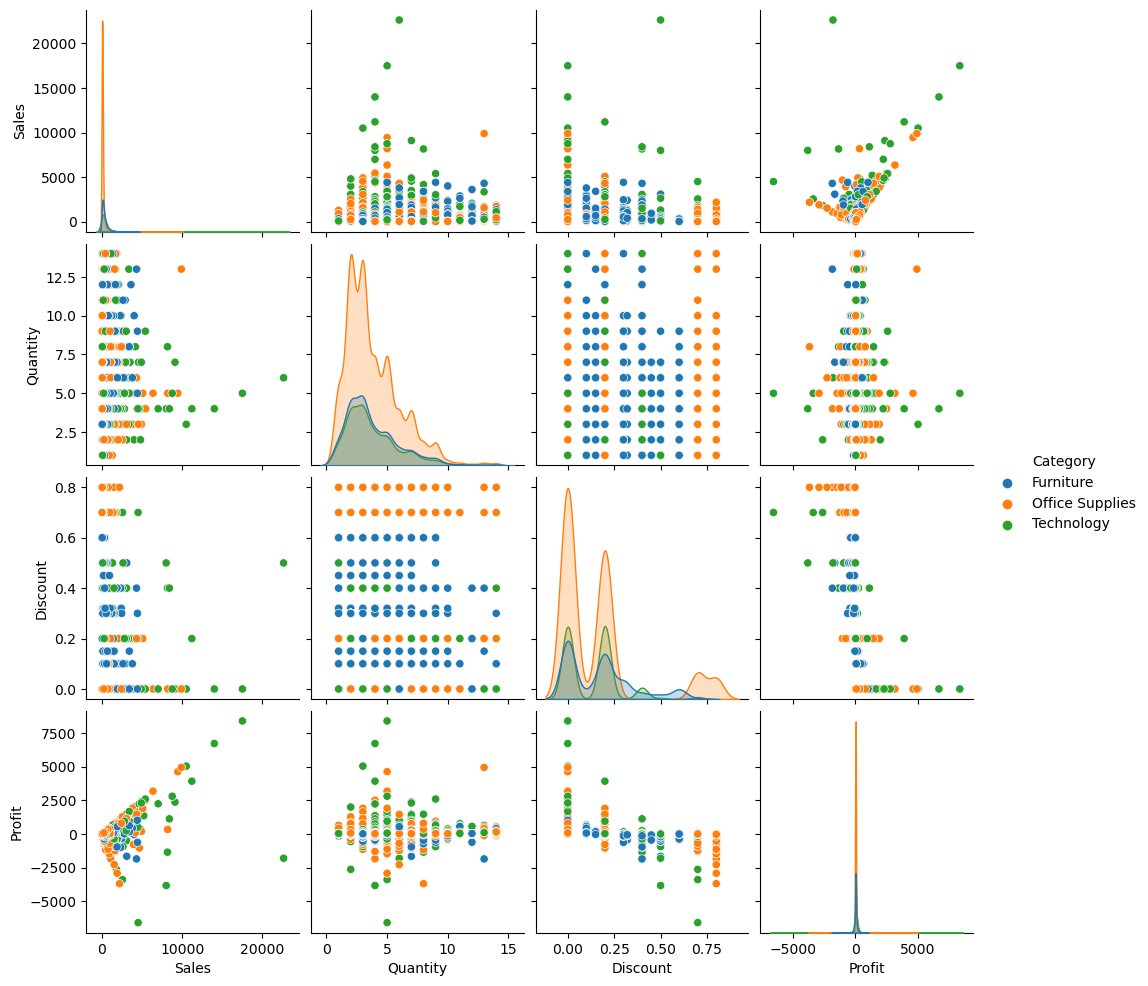

In [49]:
#visualizing the dataset using pairplot on basis of Category Column
sb.pairplot(df,hue='Category')

C:\Users\GS\AppData\Local\Temp\ipykernel_1464\244656986.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

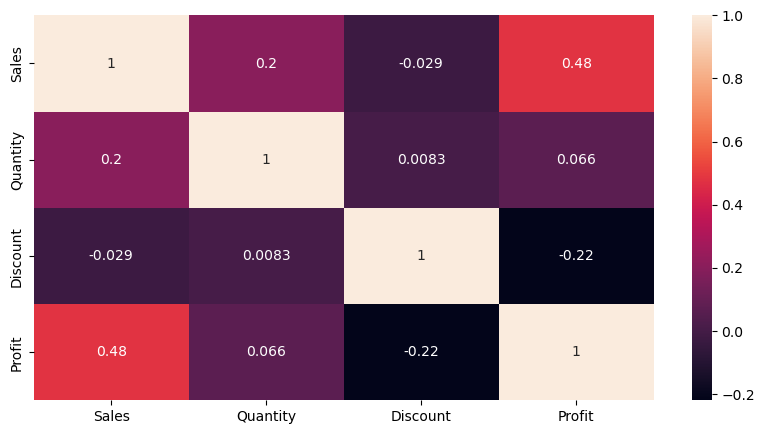

In [50]:
# Finding the pairwise corellation between the atributes and visualizing them using heatmap
cor = df.corr()
cor
#visualing using Heat map
plt.subplots(figsize=(10,5))
sb.heatmap(cor,annot=True,)

<Axes: ylabel='Category'>

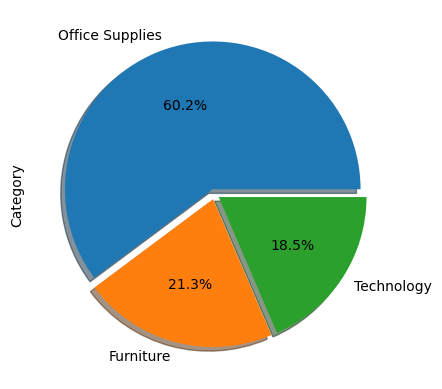

In [51]:
#Visualizing the items sold in the Category column using Pie Chart
df.Category.value_counts().plot(kind ='pie',autopct='%1.01f%%',shadow=True,explode =(0.035,0.035,0.035))

C:\Users\GS\AppData\Local\Temp\ipykernel_1464\4253170105.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Category')['Sales','Profit'].agg(['sum']).plot.bar()


<Axes: xlabel='Category'>

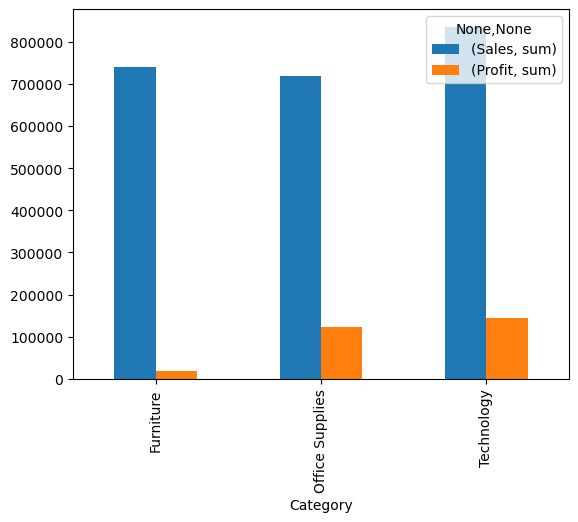

In [52]:
#plotting overall profit and sales in different category of items

df.groupby('Category')['Sales','Profit'].agg(['sum']).plot.bar()

<Axes: xlabel='Category'>

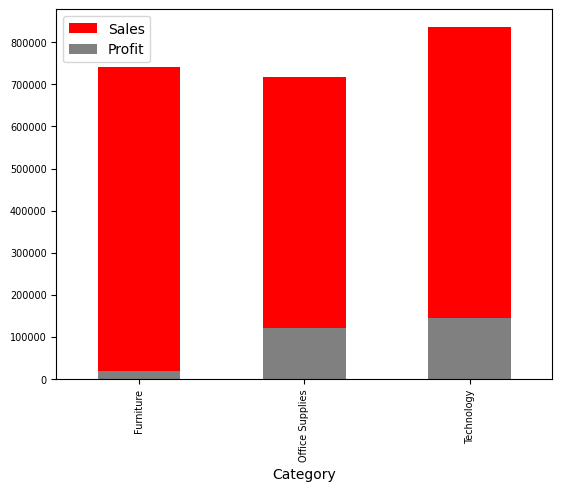

In [53]:
#calculating the top selling category of items
total_sales = df.groupby('Category').Sales.sum()

#calculating the top Profit makign category of item
total_profit = df.groupby('Category').Profit.sum()

#visualising to understand the data
total_sales.plot(kind='bar',fontsize=7,color='red',legend=True)
total_profit.plot(kind='bar',fontsize = 7,color='grey',legend=True)

<Axes: xlabel='Region'>

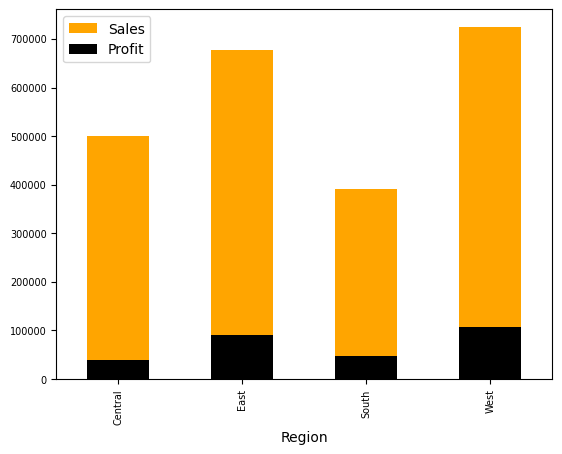

In [54]:
#calculating top region in terms of Sales
total_sales=df.groupby('Region').Sales.sum()

#calculating the top region in terms of profit
total_profit = df.groupby('Region').Profit.sum()

#visualising to understand the data
total_sales.plot(kind='bar',fontsize =7,color='orange',legend=True)
total_profit.plot(kind='bar',fontsize=7,color='black',legend=True)

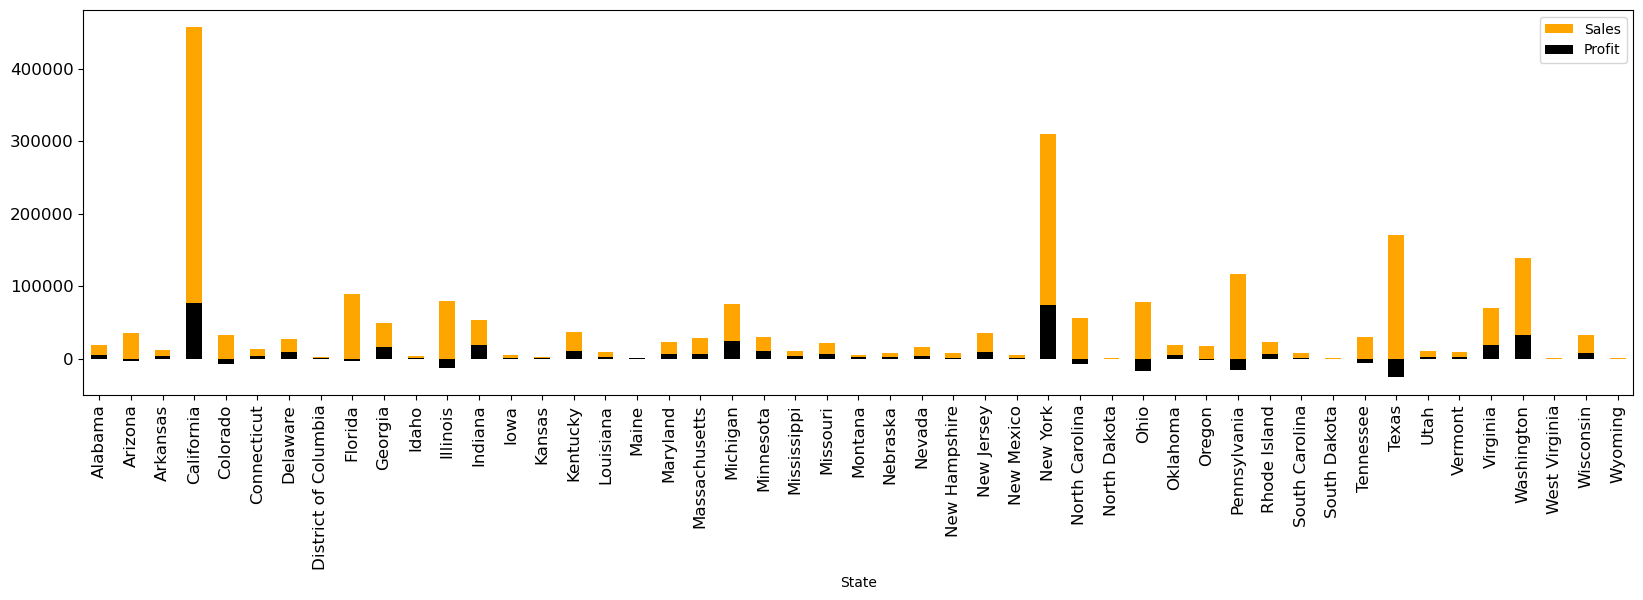

In [55]:
#calculating sales in comparison with state
total_sales = df.groupby('State').Sales.sum()

#calculating Profit in comparison with state
total_profit = df.groupby('State').Profit.sum()

#visualising to understand the data
plt.subplots(figsize=(20,5))
total_sales.plot(kind='bar',fontsize=12,color='orange',legend=True)
total_profit.plot(kind='bar',fontsize=12,color='black',legend=True)
plt.show()

<Axes: xlabel='Sub-Category'>

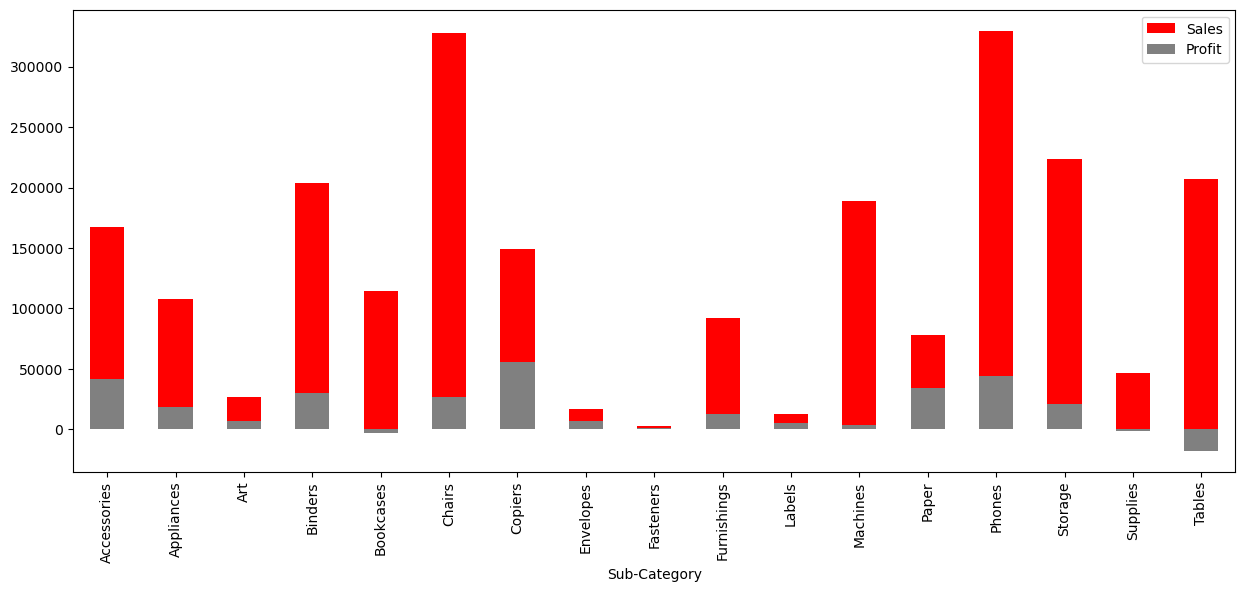

In [56]:
#Calculating the sales in comparison with subcategory
total_sales =df.groupby('Sub-Category').Sales.sum()

#calculating the profit in comparison with Subcategory
total_profit =df.groupby('Sub-Category').Profit.sum()

#visualising to understand the data

plt.subplots(figsize=(15,6))
total_sales.plot(kind='bar',fontsize=10,color='red',legend=True)
total_profit.plot(kind='bar',fontsize=10,color='grey',legend=True)

<Axes: ylabel='Sub-Category'>

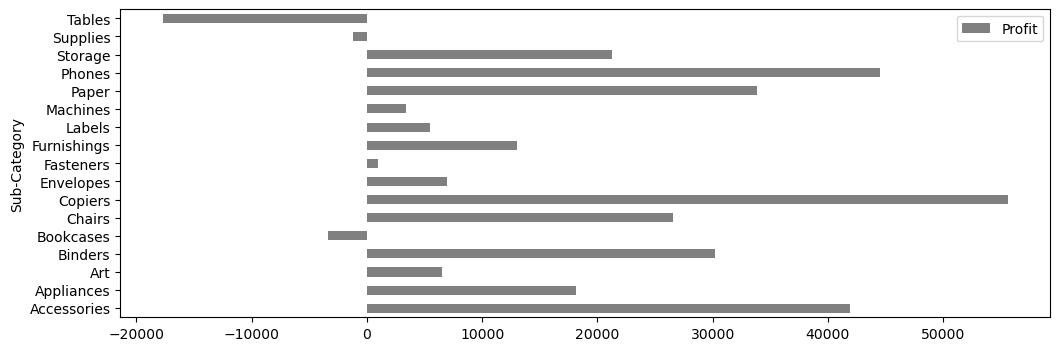

In [57]:
#visualing the profit in comparison to sub-category (horizontally)
plt.subplots(figsize=(12,4))
total_profit.plot(kind='barh',color='grey',fontsize=10,legend=True)

<Axes: xlabel='Discount', ylabel='Profit'>

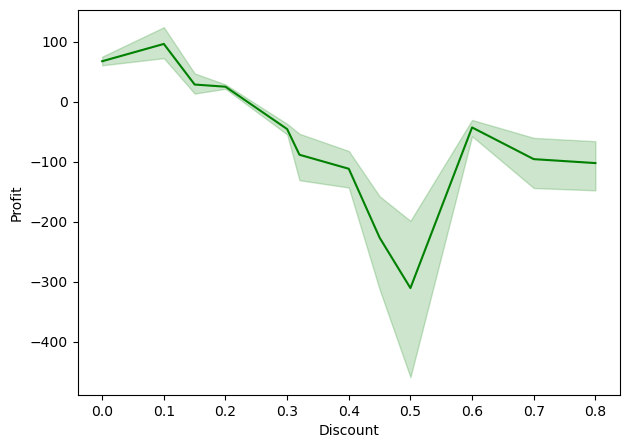

In [58]:
#plotting the discount and profit
plt.subplots(figsize=(7,5))
sb.lineplot(x=df['Discount'],color='green',y=df['Profit'])

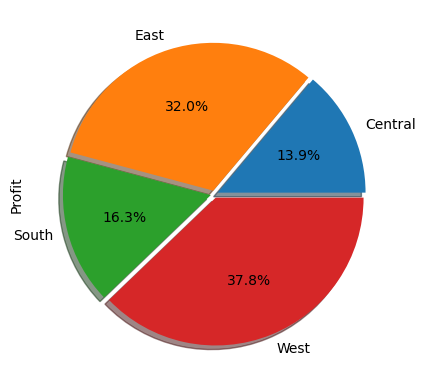

In [59]:
#visualizing the share of profit in comparison with different region using python
df.groupby('Region').Profit.sum().plot(kind='pie',y='Profit',autopct='%1.01f%%',shadow=True,explode=(0.025,0.025,0.025,0.025),)
plt.show()

<Axes: xlabel='Sales', ylabel='Profit'>

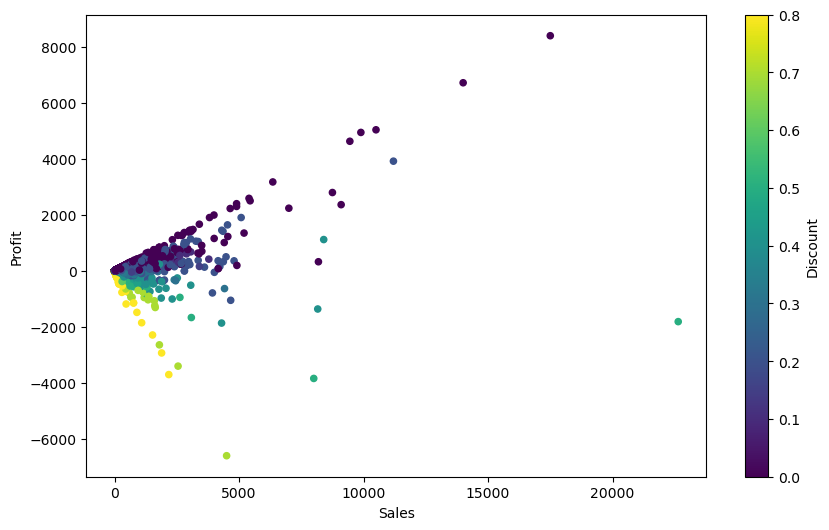

In [60]:
#Scatter plot on interdependancy of sales and profit in comparison to discount
df.plot(kind='scatter',figsize=(10,6),x='Sales',y='Profit',c='Discount',cmap='viridis')